# 時系列での分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [9]:
# !pip install -U 'pandas_datareader'

In [5]:
from pandas_datareader.yahoo.daily import YahooDailyReader
import datetime

In [6]:
date_st = datetime.datetime(2014, 1, 1) #  (year, month, day)
date_fn = datetime.datetime(2019, 12, 19)

In [7]:
df1 = YahooDailyReader('MSFT', date_st, date_fn).read().reset_index()

In [10]:
df1.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.471554
1,2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.253098
2,2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.571505


- 入力データ(x): 当日(その日)の終値
- 教師データ(t): 翌日の終値が上がれば --> 1, それ以外 --> 0

In [11]:
type(df1)

pandas.core.frame.DataFrame

In [17]:
df1['Close'][0]

37.15999984741211

In [14]:
df1['Close'][1]

36.90999984741211

In [18]:
df1['Close'][0] < df1['Close'][1]

False

In [20]:
cls = df1['Close'].values
cls

array([ 37.15999985,  36.90999985,  36.13000107, ..., 154.69000244,
       154.36999512, 155.71000671])

In [21]:
cls.shape

(1503,)

In [29]:
len(cls)

1503

In [23]:
x, t = [], []
for i in range(len(cls) - 1):
    x.append(cls[i])
    if cls[i] < cls[i +1] :
        t.append(1)
    else:
        t.append(0)

In [26]:
len(x)

1502

In [27]:
len(t)

1502

In [31]:
# x

In [83]:
x = np.array(x)
t = np.array(t)
x.min()

34.97999954223633

In [45]:
# RNN をするために、LSTM と使う時の注意点
x = x.reshape(len(x), 1, 1)

In [47]:
x.shape # 入力データは、3 次元配列で入れる必要があるため、上の行で 3D に reshape

(1502, 1, 1)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, shuffle=False)
# shuffle=False とすると行列をつながった番号で取得

In [94]:
x_train.shape

(1051, 1, 1)

In [95]:
x_val.shape

(451, 1, 1)

In [49]:
from tensorflow.keras import models, layers

In [57]:
reset_seed(0)

model = models.Sequential()

model.add(layers.LSTM(10, input_shape=(1, 1), activation='relu'))
# LSTM 層の追加。バッチ数も入れてもいいが、省略可能
model.add(layers.Dense(2, activation='softmax'))

opt = keras.optimizers.SGD(0.01)

model.compile(loss='sparse_categorical_crossentropy', 
             optimizer=opt,
             metrics=['accuracy'])

In [96]:
# history = model.fit(x_train, t_train,
#                    batch_size=128,
#                    epochs=20,
#                    validation_data=(x_val, t_val), shuffle=False)

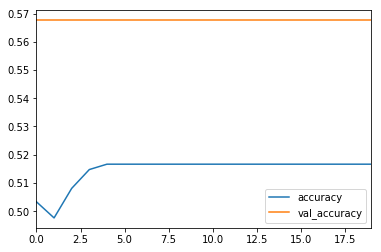

In [59]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

In [79]:
reset_seed(0)

model = models.Sequential()

model.add(layers.LSTM(10, input_shape=(1, 1), activation='relu', 
                      recurrent_activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(2, activation='softmax'))

opt = keras.optimizers.SGD(0.01)

model.compile(loss='sparse_categorical_crossentropy', 
             optimizer=opt,
             metrics=['accuracy'])

In [93]:
# history = model.fit(x_train, t_train,
#                    batch_size=128,
#                    epochs=20,
#                    validation_data=(x_val, t_val), shuffle=False)

In [84]:
# class Prediction :
    
#     def __init__(self):
#         self.length_of_sequences = 10
#         self.in_out_neurons = 1
#         self.hidden_neurons = 300

#     def load_data(self, data, n_prev=10):
#         x, t = [], []
#         for i in range(len(cls) - 1):
#             x.append(cls[i])
#             if cls[i] < cls[i +1] :
#                 t.append(1)
#             else:
#                 t.append(0)
                
#     def create_model(self) :
#         model = Sequential()
#         model.add(LSTM(self.hidden_neurons, \
#                        batch_input_shape=(None, self.length_of_sequences, self.in_out_neurons), \
#                        return_sequences=False))
#         model.add(Dense(self.in_out_neurons))
#         model.add(Activation("linear"))
#         model.compile(loss="mape", optimizer="adam")
#         return model

In [91]:
# reset_seed(0)

# model = models.Sequential()

# model.add(layers.LSTM(10, input_shape=(1, 1), activation='relu', 
#                       recurrent_activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))

# opt = keras.optimizers.SGD(0.01)

# model.compile(loss='sparse_categorical_crossentropy', 
#              optimizer=opt,
#              metrics=['accuracy'])

In [97]:
# history = model.fit(x_train, t_train,
#                    batch_size=128,
#                    epochs=20,
#                    validation_data=(x_val, t_val), shuffle=False)

In [100]:
len(x_train), len(x_val)

(1051, 451)

In [138]:
x_train.shape

(1051, 1, 1)

In [139]:
x_val.shape

(451, 1, 1)

In [109]:
x.shape

(1502, 1, 1)

In [102]:
t

array([0, 0, 1, ..., 0, 0, 1])

In [140]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(1, (100, 3), activation='relu', padding='same', 
                        input_shape=(100, 3, 1)))
model.add(layers.MaxPool2D((3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
# model.add(layers.LSTM(100, activation='relu', input_shape=(100, 1, 1)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [141]:
opt = keras.optimizers.SGD(0.01)

model.compile(loss='sparse_categorical_crossentropy', 
             optimizer=opt,
             metrics=['accuracy'])

In [142]:
history = model.fit(x_train, t_train,
                   batch_size=128,
                   epochs=30,
                   validation_data=(x_val, t_val), shuffle=False)

ValueError: Error when checking input: expected conv2d_19_input to have 4 dimensions, but got array with shape (1051, 1, 1)